In [1]:
# ============IMPORT LIBRARY ================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [3]:
# Load data
data = pd.read_csv('salary_prediction_data.csv')

In [10]:
# Min and max salaries
print("Min salary:", data['Salary'].min())
print("Max salary:", data['Salary'].max())
print("Salary range:", data['Salary'].max() - data['Salary'].min())

Min salary: 33510.51066927126
Max salary: 193016.60214967115
Salary range: 159506.0914803999


In [2]:
results = {}#FOR RandomForestRegressor

     Education  Experience  Location Job_Title  Age  Gender         Salary
0  High School           8     Urban   Manager   63    Male   84620.053665
1          PhD          11  Suburban  Director   59    Male  142591.255894
2     Bachelor          28  Suburban   Manager   61  Female   97800.255404
3  High School          29     Rural  Director   45    Male   96834.671282
4          PhD          25     Urban   Analyst   26  Female  132157.786175
        Experience          Age         Salary
count  1000.000000  1000.000000    1000.000000
mean     14.771000    42.377000  105558.404239
std       8.341111    13.609412   28256.972075
min       1.000000    20.000000   33510.510669
25%       7.000000    30.000000   85032.141517
50%      15.000000    43.000000  104314.518315
75%      22.000000    55.000000  126804.047524
max      29.000000    64.000000  193016.602150
Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64


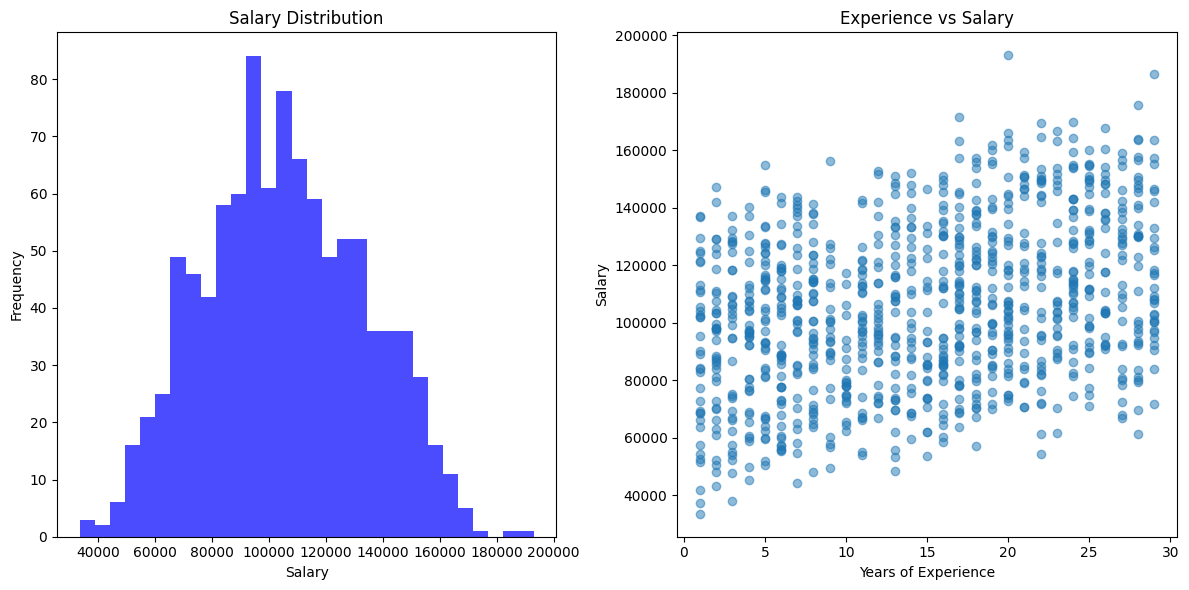

In [4]:
# =======DATA PREPROCESSING AND EXPLORATION============

print(data.head())
print(data.describe())
print(data.isnull().sum())

# Visualizations
plt.figure(figsize=(12, 6))

# Salary distribution
plt.subplot(1, 2, 1)
plt.hist(data['Salary'], bins=30, color='blue', alpha=0.7)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Experience vs Salary
plt.subplot(1, 2, 2)
plt.scatter(data['Experience'], data['Salary'], alpha=0.5)
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()

In [5]:
# Encode categorical variables
def encode_categorical(df, columns):
    for col in columns:
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
    return df

categorical_cols = ['Education', 'Location', 'Job_Title', 'Gender']
data_encoded = encode_categorical(data.copy(), categorical_cols)

# Separate features and target
X = data_encoded.drop('Salary', axis=1).values
y = data_encoded['Salary'].values.reshape(-1, 1)

# Train-test split
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_idx]], X[indices[split_idx:]]
    y_train, y_test = y[indices[:split_idx]], y[indices[split_idx:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Iteration 0: MSE = 11986879328.7872
Iteration 1000: MSE = 95868831.1437
Iteration 2000: MSE = 95764130.3655
Iteration 3000: MSE = 95763974.4480
Iteration 4000: MSE = 95763974.2148

Linear Regression Results:
MSE: 105481059.2860
RMSE: 10270.3972
R² Score: 0.8533


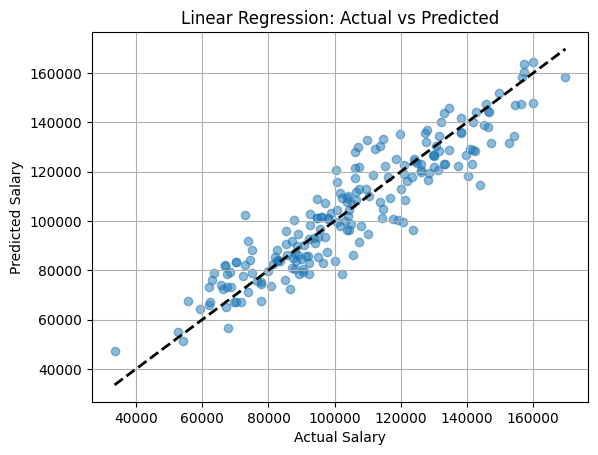

In [7]:
# ======== LINEAR REGRESSION ========
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).reshape(-1, 1)

        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for i in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # track MSE during training
            if i % 1000 == 0:
                mse = np.mean((y - y_pred) ** 2)
                print(f"Iteration {i}: MSE = {mse:.4f}")

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        return np.dot(X, self.weights) + self.bias

    def mse(self, y_true, y_pred):
        y_true = np.array(y_true).reshape(-1, 1)
        return np.mean((y_true - y_pred) ** 2)

    def r2_score(self, y_true, y_pred):
        y_true = np.array(y_true).reshape(-1, 1)
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)

# ======== TRAINING ========
# Scale your data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale y if it has large values
y_train = np.array(y_train)
y_test = np.array(y_test)

lr = LinearRegression(learning_rate=0.01, n_iterations=5000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("\nLinear Regression Results:")
print(f"MSE: {lr.mse(y_test, y_pred):.4f}")
print(f"RMSE: {math.sqrt(lr.mse(y_test, y_pred)):.4f}")
print(f"R² Score: {lr.r2_score(y_test, y_pred):.4f}")

# ======== PLOTTING ========
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()


Iteration 0: MSE = 11986879328.7872
Iteration 2000: MSE = 96271541.0847
Iteration 4000: MSE = 95689596.2951
Iteration 6000: MSE = 95509832.8039
Iteration 8000: MSE = 95454288.6614

Polynomial Regression (degree=2) Results:
MSE: 106890914.2468
RMSE: 10338.8062
R2 Score: 0.8513


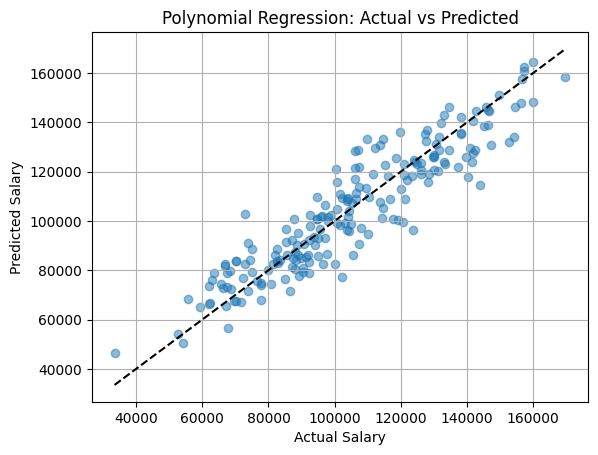

In [18]:
# =========== POLYNOMIAL REGRESSION ===============
class PolynomialRegression:
    def __init__(self, degree=2, learning_rate=0.01, n_iterations=10000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.scaler_X = None  # scaler for features

    def create_polynomial_features(self, X):
        # For simplicity, only generate powers of the first feature
        X_poly = X.copy()
        for d in range(2, self.degree + 1):
            X_poly = np.hstack((X_poly, (X[:, 0:1] ** d)))
        return X_poly

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).reshape(-1, 1)

        # Create polynomial features
        X_poly = self.create_polynomial_features(X)

        # Scale polynomial features (very important!)
        self.scaler_X = StandardScaler()
        X_poly = self.scaler_X.fit_transform(X_poly)

        n_samples, n_features = X_poly.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for i in range(self.n_iterations):
            y_pred = np.dot(X_poly, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X_poly.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 2000 == 0:
                mse = np.mean((y - y_pred) ** 2)
                print(f"Iteration {i}: MSE = {mse:.4f}")

    def predict(self, X):
        X_poly = self.create_polynomial_features(np.array(X, dtype=np.float64))
        X_poly = self.scaler_X.transform(X_poly)
        return np.dot(X_poly, self.weights) + self.bias

    def mse(self, y_true, y_pred):
        y_true = np.array(y_true).reshape(-1, 1)
        return np.mean((y_true - y_pred) ** 2)

    def r2_score(self, y_true, y_pred):
        y_true = np.array(y_true).reshape(-1, 1)
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)


# ======== Train and Evaluate ========
poly_reg = PolynomialRegression(degree=2, learning_rate=0.01, n_iterations=10000)
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)

print("\nPolynomial Regression (degree=2) Results:")
print(f"MSE: {poly_reg.mse(y_test, y_pred_poly):.4f}")
print(f"RMSE: {math.sqrt(poly_reg.mse(y_test, y_pred_poly)):.4f}")
print(f"R2 Score: {poly_reg.r2_score(y_test, y_pred_poly):.4f}")

# ======== Plot ========
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.grid(True)
plt.show()



Improved Decision Tree Regression Results:
MSE: 171750568.6065
RMSE: 13105.3641
R2 Score: 0.7611


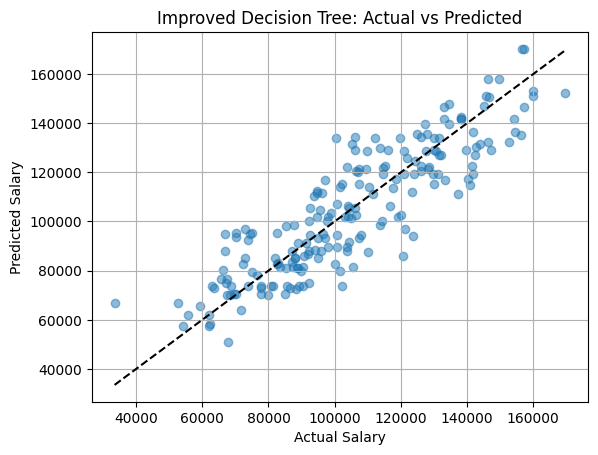

In [17]:
# =============DECISION TREE REGRESSOR ===============
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None

    def _calculate_variance(self, y):
        return np.var(y) if len(y) > 0 else 0

    def _split(self, X, y, feature_idx, threshold):
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    def _find_best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_variance_reduction = -np.inf

        current_variance = self._calculate_variance(y)
        n = len(y)

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split(X, y, feature_idx, threshold)

                if len(y_left) < self.min_samples_leaf or len(y_right) < self.min_samples_leaf:
                    continue
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                variance_left = self._calculate_variance(y_left)
                variance_right = self._calculate_variance(y_right)

                weighted_variance = (len(y_left)/n) * variance_left + (len(y_right)/n) * variance_right
                variance_reduction = current_variance - weighted_variance

                if variance_reduction > best_variance_reduction:
                    best_variance_reduction = variance_reduction
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)

        if n_samples < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth) or self._calculate_variance(y) < 1e-7:
            return {'value': np.mean(y)}

        feature, threshold = self._find_best_split(X, y)
        if feature is None:
            return {'value': np.mean(y)}

        X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)

        left_subtree = self._build_tree(X_left, y_left, depth+1)
        right_subtree = self._build_tree(X_right, y_right, depth+1)

        return {
            'feature': feature,
            'threshold': threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def fit(self, X, y):
        self.tree = self._build_tree(np.array(X), np.array(y))

    def _predict_sample(self, x, node):
        if 'value' in node:
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_sample(x, self.tree) for x in X]).reshape(-1, 1)

    def mse(self, y_true, y_pred):
        y_true = np.array(y_true).reshape(-1, 1)
        return np.mean((y_true - y_pred)**2)

    def r2_score(self, y_true, y_pred):
        y_true = np.array(y_true).reshape(-1, 1)
        ss_res = np.sum((y_true - y_pred)**2)
        ss_tot = np.sum((y_true - np.mean(y_true))**2)
        return 1 - (ss_res / ss_tot)


# Train with improved hyperparameters
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=3)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

print("\nImproved Decision Tree Regression Results:")
print(f"MSE: {tree_reg.mse(y_test, y_pred_tree):.4f}")
print(f"RMSE: {math.sqrt(tree_reg.mse(y_test, y_pred_tree)):.4f}")
print(f"R2 Score: {tree_reg.r2_score(y_test, y_pred_tree):.4f}")

# Plot results
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Improved Decision Tree: Actual vs Predicted')
plt.grid(True)
plt.show()